In [33]:
import math as mt
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from numba import jit
from mpl_toolkits import mplot3d

In [22]:
class turing_space_schnakenberg:
    
    def __init__(self,list_total_elements,list_Dv):
        
        self.list_total_elements = list_total_elements
        self.list_Dv = list_Dv
        self.a = []
        self.b = []
        self.Dv = []
          
    def Turing_Conditions(self):
        
        for i in self.list_total_elements:
            for j in self.list_total_elements:
                for k in self.list_Dv:
                    if ((j-i) < ((i+j)**3)) and (((i+j)**2)>0) and ((k*(j-i))>((i+j)**3)) and ((((k*(j-i))-(i+j)**3)**2)>(4*k*((i+j)**3))):
                        self.a.append(i)
                        self.b.append(j)
                        self.Dv.append(k)
        return self.a,self.b,self.Dv
        
    def delete_repeated_elements(self):
        
        turing_space_matrix = np.array([self.a,self.b,self.Dv])
        turing_space_matrix = np.transpose(turing_space_matrix)
    
        min = 0
    
        turing_space = np.zeros([1,3])
    
        for i in range(len(turing_space_matrix)):
            max = int(turing_space_matrix[i][2])
            if max >= min:
                min = max
            else:
                new_row =np.array([turing_space_matrix[i-1]])
                turing_space = np.append(turing_space,new_row,axis=0)
                min = 0
    
        turing_space = turing_space[1:]
    
        turing_space = np.unique(turing_space, axis=0)
    
        return turing_space
      

In [45]:
#we create an instance of the turing_space_schnakenberg class

list_total_numbers = np.round(np.linspace(0,2,1000),2)

list_diffusion_Dv = np.round(np.arange(50),2)

space = turing_space_schnakenberg(list_total_numbers,list_diffusion_Dv)

a, b, Dv = space.Turing_Conditions()

space_Turing = space.delete_repeated_elements()

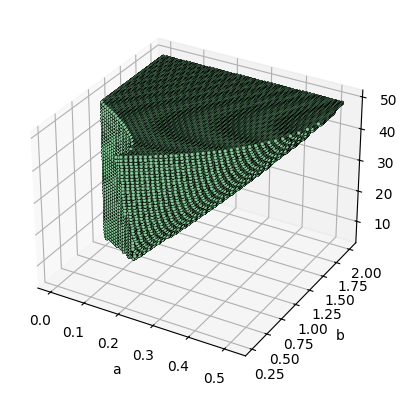

In [47]:
#Plot
x = a
y = b
z = Dv

fig,ax = plt.figure(),plt.axes(projection = '3d')

ax.scatter(x, y, z, c='#88c999', marker='o', s=6, alpha=0.6, edgecolors='k', linewidths=0.2)

ax.set_xlabel("a")
ax.set_ylabel("b")
ax.set_zlabel("Dv")

plt.show()